# Algoritmos de Machine Learning com Scikit-learn

## Trabalho Cap 3, fase 4

### Grupo DRELL

Notas: 
- O dataset foi baixado da internet, usando o link:
https://archive.ics.uci.edu/dataset/236/seeds
- Inclui uma primeira linha para descrever as colunas


### Etapa 1 - Analisar e pre-processar os dados
1.1 - Nesta estapa vamos carregar os dados do arquivo e exibir as primeiras linhas

In [23]:
import pandas as pd

df = pd.read_csv('seeds_dataset.txt',  delim_whitespace=True, encoding='utf-8')
print(df.head())

    Area  Perimetro  Compacidade  Comprimento do Nucleo  Largura Nucleo  \
0  15.26      14.84       0.8710                  5.763           3.312   
1  14.88      14.57       0.8811                  5.554           3.333   
2  14.29      14.09       0.9050                  5.291           3.337   
3  13.84      13.94       0.8955                  5.324           3.379   
4  16.14      14.99       0.9034                  5.658           3.562   

   Coeficiente de Assimetria  Comprimento do Sulco do Nucleo  Tipo Grão  
0                      2.221                           5.220          1  
1                      1.018                           4.956          1  
2                      2.699                           4.825          1  
3                      2.259                           4.805          1  
4                      1.355                           5.175          1  


C:\Users\seber\AppData\Local\Temp\ipykernel_16108\517007362.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('seeds_dataset.txt',  delim_whitespace=True, encoding='utf-8')


1.2 - Agora vamos calcular a média, mediana e desvio paddrão de todas as colunas (características) do nosso dataset 

In [31]:
estatisticas = pd.DataFrame({
    'Média': df.mean(),
    'Mediana': df.median(),
    'Desvio Padrão': df.std()
})
# imprime as estatiscas básicas (media, mediana e desvio padrão)
print(estatisticas)

# uma analise mais detalhada de outras métricas deste dataset
print(df.describe())   


                                    Média   Mediana  Desvio Padrão
Area                            14.847524  14.35500       2.909699
Perimetro                       14.559286  14.32000       1.305959
Compacidade                      0.870999   0.87345       0.023629
Comprimento do Nucleo            5.628533   5.52350       0.443063
Largura Nucleo                   3.258605   3.23700       0.377714
Coeficiente de Assimetria        3.700201   3.59900       1.503557
Comprimento do Sulco do Nucleo   5.408071   5.22300       0.491480
Tipo Grão                        2.000000   2.00000       0.818448
             Area   Perimetro  Compacidade  Comprimento do Nucleo  \
count  210.000000  210.000000   210.000000             210.000000   
mean    14.847524   14.559286     0.870999               5.628533   
std      2.909699    1.305959     0.023629               0.443063   
min     10.590000   12.410000     0.808100               4.899000   
25%     12.270000   13.450000     0.856900          

1.3 - Visualizar a distribuição dos dados

Primeiro exibir o histograma de todas as colunas (características)

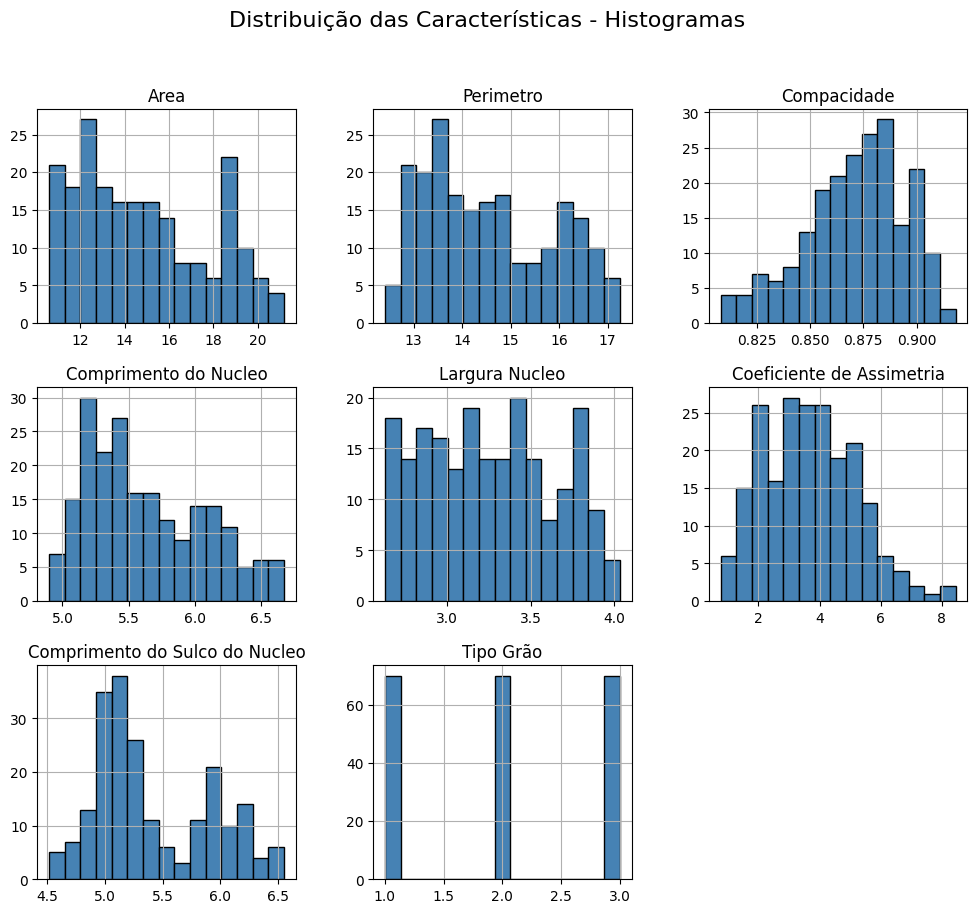

In [25]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 10), bins=15, color='steelblue', edgecolor='black')
plt.suptitle('Distribuição das Características - Histogramas', fontsize=16)
plt.show()


Agora vamos explorar o Boxplots de todas as colunas para entender o range (distribuição) dos dados

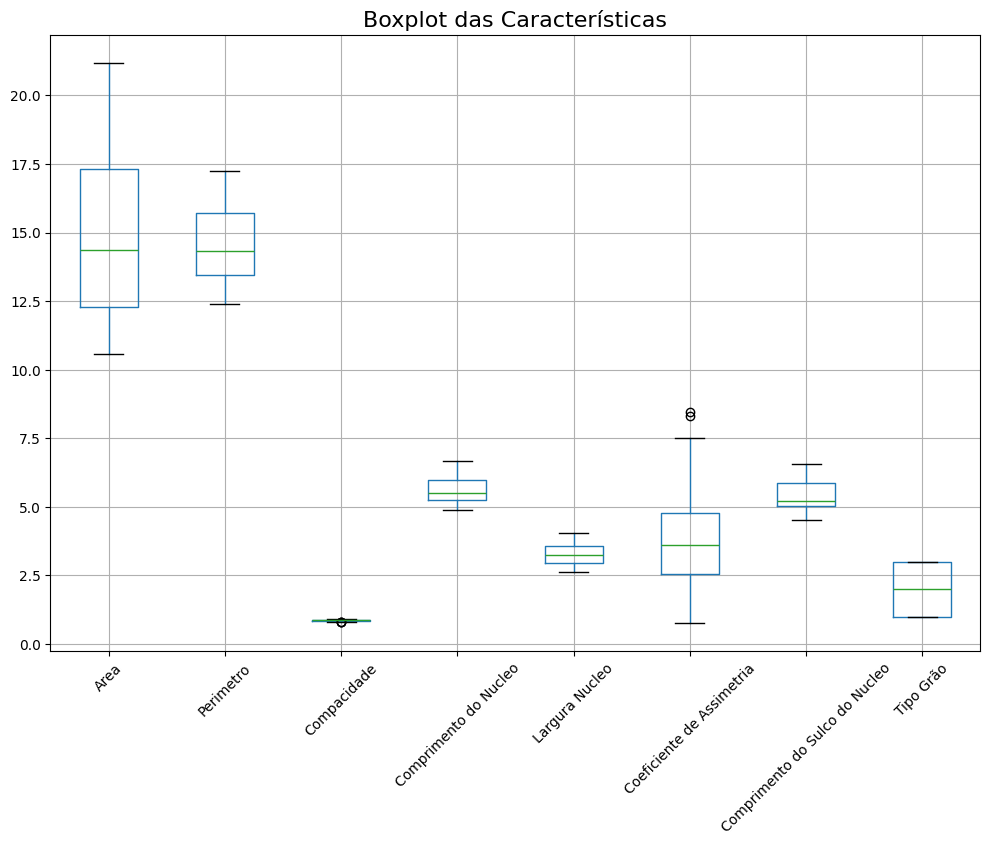

In [26]:
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Boxplot das Características', fontsize=16)
plt.xticks(rotation=45)
plt.show()


Agora vamos analisar a relação entre as colunas usando o Gráfico de dispersão!

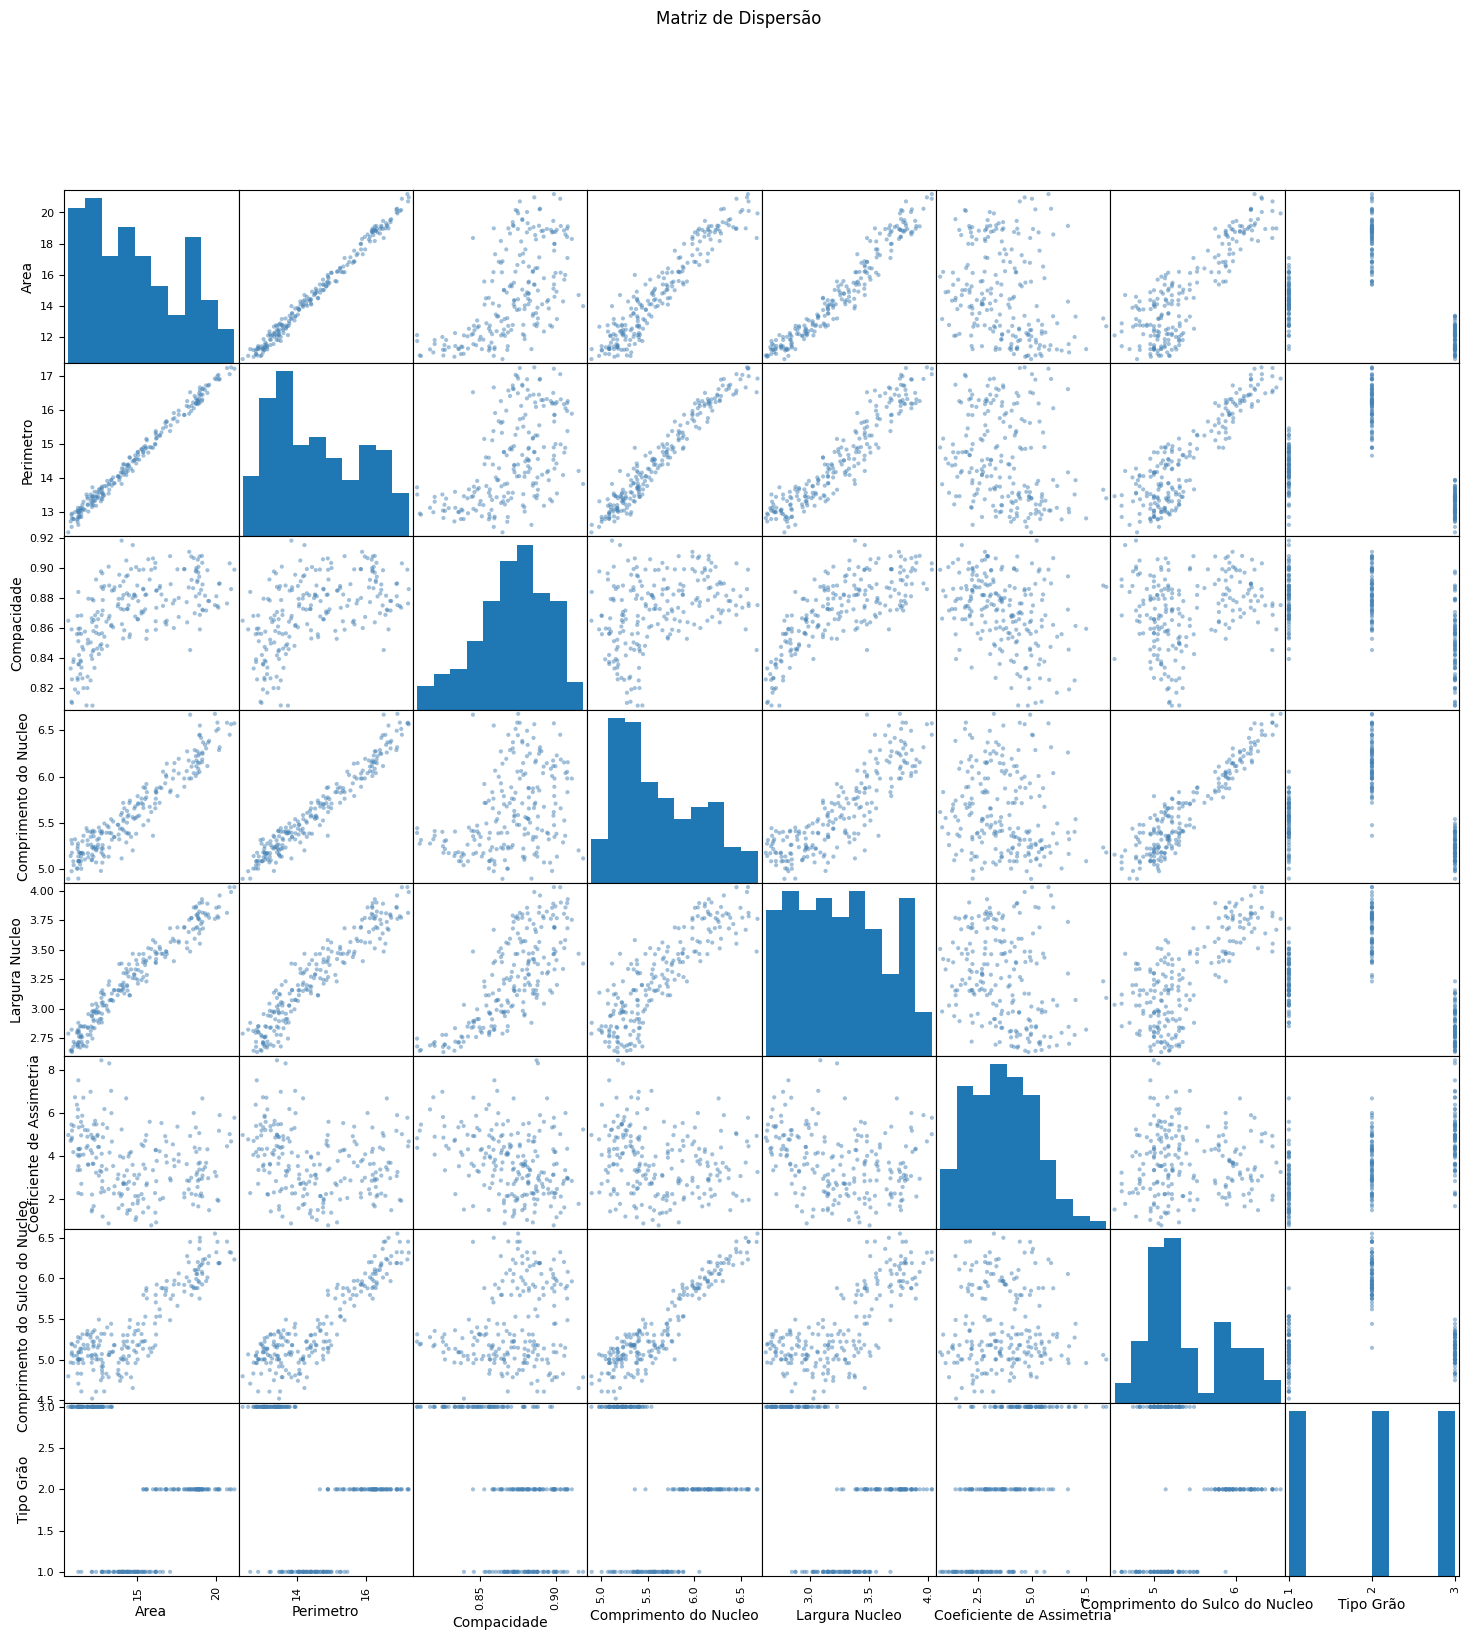

In [32]:
pd.plotting.scatter_matrix(df, figsize=(18, 18), diagonal='hist', color='steelblue')
plt.suptitle('Matriz de Dispersão')
plt.show()


Olhando este gráfico conseguimos extrair algumas informações dos dados como por exemplo:
- O comprimento do Sulco do Nucleo são maiores nos grão dos tipo 3 comparado aos demais
- A área de cultivo é menor para grãos do tipo 3
- Os grãos do tipo 3 são mais assimétricos comparados aos demais


Vamos calcular o coeficiente de correlação entre as variáveis para avaliar o impacto de cada característica com as demais


In [34]:
# Calculando a correlação entre as variáveis
correlacao = df.corr()
print(correlacao)

                                    Area  Perimetro  Compacidade  \
Area                            1.000000   0.994341     0.608288   
Perimetro                       0.994341   1.000000     0.529244   
Compacidade                     0.608288   0.529244     1.000000   
Comprimento do Nucleo           0.949985   0.972422     0.367915   
Largura Nucleo                  0.970771   0.944829     0.761635   
Coeficiente de Assimetria      -0.229572  -0.217340    -0.331471   
Comprimento do Sulco do Nucleo  0.863693   0.890784     0.226825   
Tipo Grão                      -0.346058  -0.327900    -0.531007   

                                Comprimento do Nucleo  Largura Nucleo  \
Area                                         0.949985        0.970771   
Perimetro                                    0.972422        0.944829   
Compacidade                                  0.367915        0.761635   
Comprimento do Nucleo                        1.000000        0.860415   
Largura Nucleo        

1.4 - Identificar e tratar valores ausentes

Agora vamos usar as funções do Dataframe gerado pelo Pandas para contar as colunas com valores nulos / ausentes

In [39]:
# contando os valores nulos de cada coluna
print(df.isnull().sum()) 

# Contando o total de valores faltantes em todo o dataset
print(f"Total de valores nulos: {df.isnull().sum().sum()}")

Area                              0
Perimetro                         0
Compacidade                       0
Comprimento do Nucleo             0
Largura Nucleo                    0
Coeficiente de Assimetria         0
Comprimento do Sulco do Nucleo    0
Tipo Grão                         0
dtype: int64
Total de valores nulos: 0


### Etapa 2 - Avaliar o melhor algoritmos de classificação

Aqui vamos testar diferentes algoritmos para classificar estes dados e comparar o resultado entre eles.

Vams começar importando as bibliotecas do sklearn para este experimento

In [43]:
#importando a biblioteca que permite dividir o dataset em treino e teste
from sklearn.model_selection import train_test_split

# immportando a biblioteca que permite medir a acurácia dos modelos
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# importantnado as bibliotetcas de machine learning dos algoritmos que iremos usar
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


Vamos agora separar os dados da classificação que queremos prever.. A classificação é a última columa que chamamos de tipo de grão. 
Vamos também dividir os dados para usar 70% deles para treinar o modelo e 30% para fazer o teste.

In [41]:
X = df.iloc[:, :-1]  # Todas as colunas, menos a última
y = df.iloc[:, -1]   # Última coluna (classe)

# vamos separar os dados 70% para treino e separar 30% para testar o resultado do modelo
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42,  # Garantir reprodutibilidade
    stratify=y        # Garante proporcionalidade das classes
)


Vamos treinar os modelos e testar os modelos usando 3 algoritmos diferentes:
- KNN 
- SVM
- Random Forest

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)

# SVM
svm = SVC(kernel='linear')  # ou 'rbf', 'poly', etc.

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# treinar os modelos
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)

# testa os 3 modelos com os dados de teste
y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_rf = rf.predict(X_test)


Vamos agora avaliar o resultado dos testes comparando a acurácia de cada algorítimo usado para ver qual deles se saiu melhor para o nosso caso de uso. 

In [45]:
modelos = {
    'KNN': y_pred_knn,
    'SVM': y_pred_svm,
    'Random Forest': y_pred_rf
}

for nome, y_pred in modelos.items():
    print(f'\n===== {nome} =====')
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
    print("Relatório de Classificação:\n", classification_report(y_test, y_pred))



===== KNN =====
Acurácia: 0.8253968253968254
Matriz de Confusão:
 [[13  3  5]
 [ 2 19  0]
 [ 1  0 20]]
Relatório de Classificação:
               precision    recall  f1-score   support

           1       0.81      0.62      0.70        21
           2       0.86      0.90      0.88        21
           3       0.80      0.95      0.87        21

    accuracy                           0.83        63
   macro avg       0.83      0.83      0.82        63
weighted avg       0.83      0.83      0.82        63


===== SVM =====
Acurácia: 0.8571428571428571
Matriz de Confusão:
 [[16  2  3]
 [ 3 18  0]
 [ 1  0 20]]
Relatório de Classificação:
               precision    recall  f1-score   support

           1       0.80      0.76      0.78        21
           2       0.90      0.86      0.88        21
           3       0.87      0.95      0.91        21

    accuracy                           0.86        63
   macro avg       0.86      0.86      0.86        63
weighted avg       0.86    

### Etapa 3 - Optimizar os modelos

Nesta etapa vamos usar técnicas como Grid Search para encontrar os melhores hiperparâmetros para cada modelo.
Para isso vamos definir a lista de parâmetros e vairações que queremos testar.

In [46]:
from sklearn.model_selection import GridSearchCV

# KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


Agora vamos executar o GridSearch para cada modelo para fazer o experimento e avaliar os resultados.

In [49]:
# KNN
grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid_knn,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_knn.fit(X_train, y_train)
print("KNN")
print("Melhores parâmetros KNN:", grid_knn.best_params_)
print("Melhor acurácia KNN:", grid_knn.best_score_)
print("\n")
# SVM
grid_svm = GridSearchCV(
    SVC(),
    param_grid_svm,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_svm.fit(X_train, y_train)

print("SVM")
print("Melhores parâmetros SVM:", grid_svm.best_params_)
print("Melhor acurácia SVM:", grid_svm.best_score_)
print("\n")

# Random Forest
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_rf.fit(X_train, y_train)

print("Random Forest")
print("Melhores parâmetros Random Forest:", grid_rf.best_params_)
print("Melhor acurácia Random Forest:", grid_rf.best_score_)
print("\n")


KNN
Melhores parâmetros KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Melhor acurácia KNN: 0.9388505747126438


SVM
Melhores parâmetros SVM: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Melhor acurácia SVM: 0.973103448275862


Random Forest
Melhores parâmetros Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Melhor acurácia Random Forest: 0.9124137931034483




Agora vamos retreinar os modelos usando os parâmetros recomendados para cada algorritmo

In [51]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan')
knn.fit(X_train, y_train)

# SVM
svm = SVC(C=100, kernel='linear', gamma='scale')
svm.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_split=5, min_samples_leaf=2, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, n_estimators=50,
                       random_state=42)

Vamos agora executar novamente os modelos usando os 30% da massa de dados separadas para os testes e avaliar o resultado.

In [52]:
# Rodando os modelos com os melhores parâmetros
y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Avaliando os modelos com os melhores parâmetros
modelos = {
    'KNN': y_pred_knn,
    'SVM': y_pred_svm,
    'Random Forest': y_pred_rf
}

for nome, y_pred in modelos.items():
    print(f'\n===== {nome} =====')
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
    print("Relatório de Classificação:\n", classification_report(y_test, y_pred))


===== KNN =====
Acurácia: 0.8571428571428571
Matriz de Confusão:
 [[16  2  3]
 [ 3 18  0]
 [ 1  0 20]]
Relatório de Classificação:
               precision    recall  f1-score   support

           1       0.80      0.76      0.78        21
           2       0.90      0.86      0.88        21
           3       0.87      0.95      0.91        21

    accuracy                           0.86        63
   macro avg       0.86      0.86      0.86        63
weighted avg       0.86      0.86      0.86        63


===== SVM =====
Acurácia: 0.873015873015873
Matriz de Confusão:
 [[17  1  3]
 [ 3 18  0]
 [ 1  0 20]]
Relatório de Classificação:
               precision    recall  f1-score   support

           1       0.81      0.81      0.81        21
           2       0.95      0.86      0.90        21
           3       0.87      0.95      0.91        21

    accuracy                           0.87        63
   macro avg       0.88      0.87      0.87        63
weighted avg       0.88     

#### KNN
Foi percebido uma melhora na precisão para identificar as classes 2 e 3, porém na classe 1 houve uma piora de 1%. 
No geral a acurácia subiu de 83% para 86% após os ajustes dos parâmetros

#### SVM
A Acurácia em si mudou apenas 1 pnoto percentual. Porém o F1 Score que mede a harmonia entre precisão e recall teve um aumento de até 3 pontos percentuais para algumas classes. No geral a acurácia saiu de 86% para 87%.

#### Random Forest
No caso deste modelo os resultados perderam precisão comparados com a versào do modelo sem usar os parâemtros recomendados. A acurácia caiu de 92% para 87%. A precisão para prever a classe 1 por exemplo chegou a ter uma performance 10% melhor no modelo anterior (94% comparado a 84% do modelo treinado com os parâmetros recoendados)

### Etapa 4 - Interpretar os resultados

Analisando os resultados obtidos com os três algoritmos (KNN, SVM e Random Forest), observamos que o Random Forest (versão inicial sem o uso dos parâmetros recomendados) apresentou o melhor desempenho geral, com maior acurácia e equilíbrio entre precisão, recall e F1-score em todas as classes. O SVM também demonstrou um desempenho consistente, especialmente em situações com classes bem separadas. O KNN, apesar de simples e rápido, teve desempenho inferior, sendo mais sensível a ruídos e à distribuição dos dados.

#### Acurácia
| Modelo        | Acurácia (Teste) |
| ------------- | ---------------- |
| KNN           | 86%          |
| SVM           | 87%          |
| * Random Forest | 92%          |

* O resultado do Random Forest foi considerado a versão sem o uso dos parâmetros recomendados. 

#### F1-Score (geral para todas as classes)
O fato do KNN ter tido um score menor pode indicar que ele esta sofrendo com a escolha dos vizinhos ou com ruídos nos dados
Isto explica porque o Random Forest teve um melhor desempenho, isso geralmente ocorre quando há ruído nos dados.
O SVM teve um bom score o que é esperado para modelos pequenos (nosso dataset tem 210 amostras no total )

#### Matriz de Confusão
- KNN erou muito nas classes 2 e 3 (de novo por indicios de ruído nos dados)
- SVM errou menos nas fronteiras entre as classes mais próximas
- Random Forest errou menos no geral, distribuindo melhor as previsões feitas com a massa de testes

#### Conclusão do experimento

Com base nesses experimentos entendo que o Random Forest é o mais indicado para tarefas de classificação futuras com este dataset, especialmente se o foco for maior robustez e capacidade de generalização.